In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)
library(viridis)

In [3]:
cadaver_5krare = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")


### Alpha Diversity

In [4]:
Ita = subset_samples(cadaver_5krare, Location=="Italy")
Fin = subset_samples(cadaver_5krare, Location=="Finland")
USA = subset_samples(cadaver_5krare, Location=="USA")

Liver = subset_samples(cadaver_5krare, Organ=="Liver")

In [5]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/all_cadaver_metadata.csv")
colnames(sample_tab)[1] <- "SampleID"

#### Italy

In [6]:
#By Organ

obs = estimate_richness(na.omit(Ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Organ") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Organ")

stats.obs = dfobs %>%
    group_by(Organ) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Organ, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$Organ, method="bonferroni")
dunn

Organ,median,mean,sd,sem
Brain,35.0,37.10000,7.40045,2.340228
Heart,23.0,26.22222,13.80922,4.603072
Liver,39.0,39.00000,10.80895,2.997862
Prostate,82.0,93.00000,62.32709,17.286426
Spleen,43.5,37.30000,14.70487,4.650090
Uterus,77.0,93.20000,52.62319,23.533805



	Kruskal-Wallis rank sum test

data:  Observed by Organ
Kruskal-Wallis chi-squared = 16.6, df = 5, p-value = 0.005325


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 16.5997, df = 5, p-value = 0.01


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |      Brain      Heart      Liver   Prostate     Spleen
---------+-------------------------------------------------------
   Heart |   1.436261
         |     1.0000
         |
   Liver |  -0.241951  -1.756539
         |     1.0000     0.5925
         |
Prostate |  -2.069683  -3.529448  -1.960024
         |     0.2886    0.0031*     0.3749
         |
  Spleen |  -0.192100  -1.623238   0.037706   1.865438
         |     1.0000     0.7840     1.0000     0.4659
         |
  Uterus |  -1.882194  -3.031404  -1.765656  -0.304741  -1.725345
         |     0.4486    0.0183*     0.5809     1.0000     0.6335

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 16.59971

$Z
 [1]  1.43626103 -0.24195191 -1.75653981 -2.06968390 -3.52944840 -1.96002419
 [7] -0.19210069 -1.62323811  0.03770679  1.86543878 -1.88219473 -3.03140497
[13] -1.76565695 -0.30474117 -1.72534517

$P
 [1] 0.0754640397 0.4044087120 0.0394981403 0.0192409778 0.0002082135
 [6] 0.0249964813 0.4238316653 0.0522692566 0.4849607304 0.0310599632
[11] 0.0299047906 0.0012170926 0.0387267097 0.3802816451 0.0422326434

$P.adjusted
 [1] 1.000000000 1.000000000 0.592472105 0.288614667 0.003123202 0.374947219
 [7] 1.000000000 0.784038850 1.000000000 0.465899448 0.448571859 0.018256390
[13] 0.580900646 1.000000000 0.633489650

$comparisons
 [1] "Brain - Heart"     "Brain - Liver"     "Heart - Liver"    
 [4] "Brain - Prostate"  "Heart - Prostate"  "Liver - Prostate" 
 [7] "Brain - Spleen"    "Heart - Spleen"    "Liver - Spleen"   
[10] "Prostate - Spleen" "Brain - Uterus"    "Heart - Uterus"   
[13] "Liver - Uterus"    "Prostate - Uterus" "Spleen - Uterus"

In [7]:
#Sort by SI

avg <- aggregate(Observed ~ Organ, data = dfobs, mean)
dfobs$Organ <-factor(dfobs$Organ, levels=avg[order(avg$Observed), "Organ"])

png 
  2

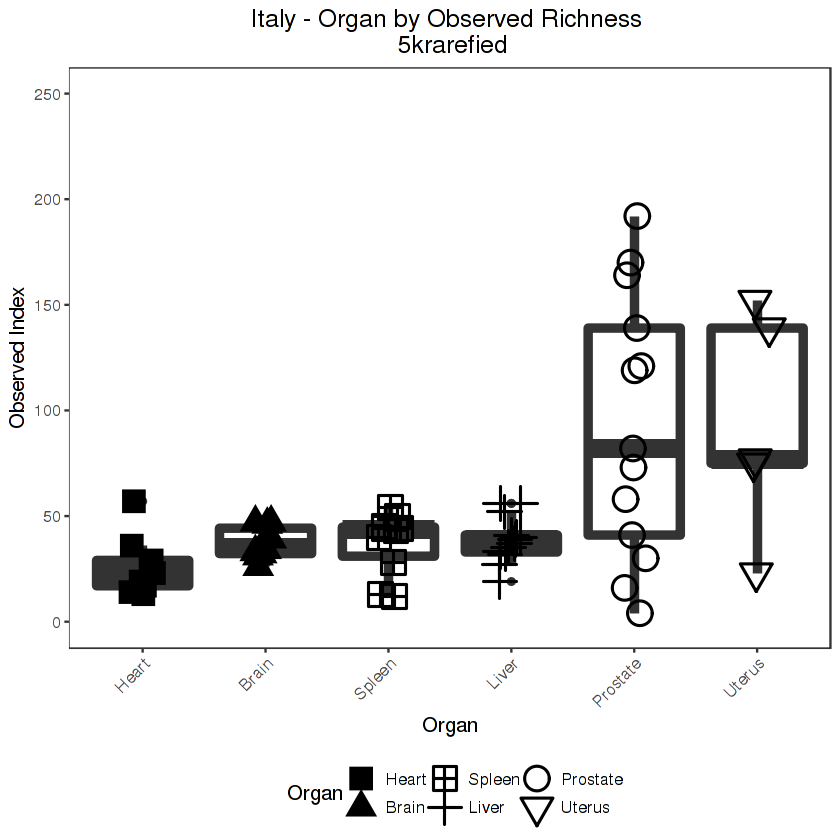

In [8]:
library(viridis)
p = ggplot(na.omit(dfobs), aes(x = Organ, y = Observed)) + ggtitle("Italy - Organ by Observed Richness \n 5krarefied")

p = p + geom_boxplot(lwd=2) + ylab("Observed Index") + ylim(0,250)

p = p + geom_point(size = 6,alpha=1, stroke=1, aes(shape = Organ),
                   position = position_jitter(h = 0, w = 0.1)) +
                   scale_shape_manual(values=c(15,17,12,3,1,6))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

png('Italy_organ_observed.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

#### USA

In [9]:
#By Organ

#obs = estimate_richness(na.omit(USA), split = TRUE, measures = "Observed")
#obs$SampleID = rownames(obs)
obs.usa = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/temp_files/obs.usa.csv")

dfobs = merge(obs.usa, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Organ") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Organ")

stats.obs = dfobs %>%
    group_by(Organ) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Organ, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$Organ, method="bonferroni")
dunn

Organ,median,mean,sd,sem
Blood,47.5,55.83333,40.49897,16.533636
Brain,42.0,78.00000,74.94832,24.982772
Heart,30.0,53.72727,65.00783,19.600599
Liver,76.0,78.46809,50.50822,7.367381
Spleen,61.5,57.80000,44.39419,14.038677



	Kruskal-Wallis rank sum test

data:  Observed by Organ
Kruskal-Wallis chi-squared = 4.8679, df = 4, p-value = 0.3011


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 4.8679, df = 4, p-value = 0.3


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |      Blood      Brain      Heart      Liver
---------+--------------------------------------------
   Brain |  -0.310517
         |     1.0000
         |
   Heart |   0.494225   0.922172
         |     1.0000     1.0000
         |
   Liver |  -0.921415  -0.648065  -1.941489
         |     1.0000     1.0000     0.2610
         |
  Spleen |   0.052224   0.414883  -0.512345   1.224486
         |     1.0000     1.0000     1.0000     1.0000

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 4.867928

$Z
 [1] -0.31051708  0.49422518  0.92217235 -0.92141599 -0.64806515 -1.94148916
 [7]  0.05222487  0.41488321 -0.51234574  1.22448686

$P
 [1] 0.37808389 0.31057358 0.17821934 0.17841664 0.25847141 0.02609949
 [7] 0.47917476 0.33911370 0.30420453 0.11038431

$P.adjusted
 [1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.2609949 1.0000000
 [8] 1.0000000 1.0000000 1.0000000

$comparisons
 [1] "Blood - Brain"  "Blood - Heart"  "Brain - Heart"  "Blood - Liver" 
 [5] "Brain - Liver"  "Heart - Liver"  "Blood - Spleen" "Brain - Spleen"
 [9] "Heart - Spleen" "Liver - Spleen"

In [10]:
#Sort by SI

avg <- aggregate(Observed ~ Organ, data = dfobs, mean)
dfobs$Organ <-factor(dfobs$Organ, levels=avg[order(avg$Observed), "Organ"])

png 
  2

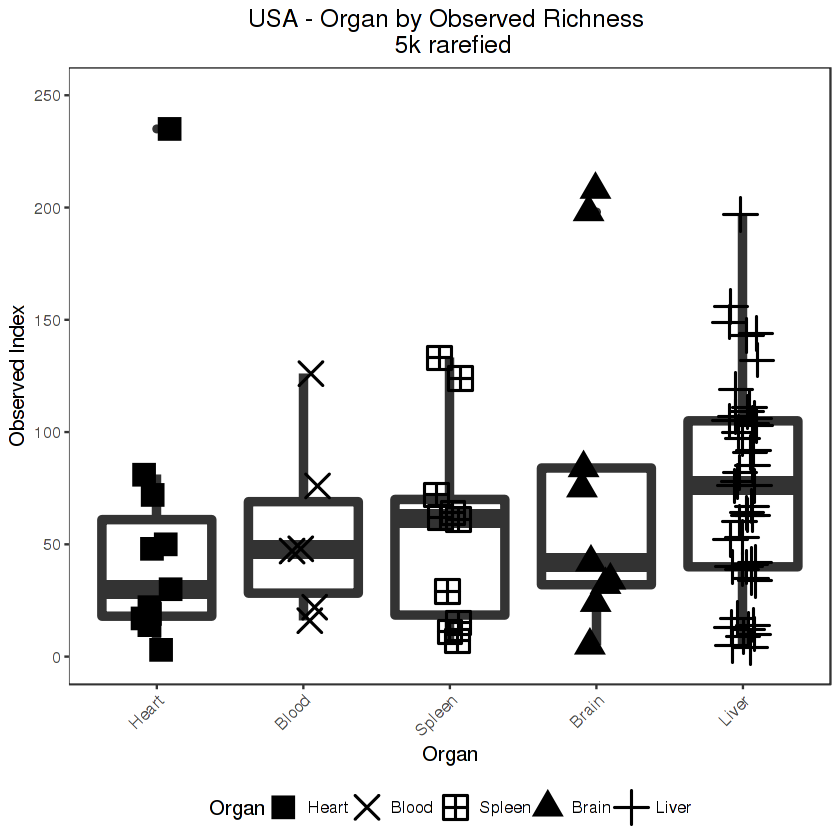

In [11]:
p = ggplot(na.omit(dfobs), aes(x = Organ, y = Observed)) + ggtitle("USA - Organ by Observed Richness \n 5k rarefied")

p = p + geom_boxplot(lwd=2) + ylab("Observed Index") + ylim(0,250)

p = p + geom_point(size = 6,alpha=1, stroke=1,  aes(shape = Organ),
                   position = position_jitter(h = 0, w = 0.1)) +
                   scale_shape_manual(values=c(15,4,12,17,3))
                 

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

png('USA_organ_observed.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

#### Liver Only (to include Finland)

In [50]:
#Liver only, all three locations (Finland, Italy, USA)

#obs = estimate_richness(na.omit(Liver), split = TRUE, measures = "Observed")
#obs$SampleID = rownames(obs)
obs = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/temp_files/obs.all.csv")

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Location") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Location")

stats.obs = dfobs %>%
    group_by(Location) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Location, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$Location, method="bonferroni")
dunn

Location,median,mean,sd,sem
Finland,9,10.35000,6.442254,1.440532
Italy,39,39.00000,10.808947,2.997862
USA,76,78.46809,50.508222,7.367381



	Kruskal-Wallis rank sum test

data:  Observed by Location
Kruskal-Wallis chi-squared = 37.517, df = 2, p-value = 7.132e-09


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 37.5173, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |    Finland      Italy
---------+----------------------
   Italy |  -2.897679
         |    0.0056*
         |
     USA |  -6.113838  -1.914417
         |    0.0000*     0.0834

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 37.51725

$Z
[1] -2.897680 -6.113839 -1.914418

$P
[1] 1.879670e-03 4.863133e-10 2.778340e-02

$P.adjusted
[1] 5.639011e-03 1.458940e-09 8.335021e-02

$comparisons
[1] "Finland - Italy" "Finland - USA"   "Italy - USA"

In [51]:
#Sort by SI

avg <- aggregate(Observed ~ Location, data = dfobs, mean)
dfobs$Location <-factor(dfobs$Location, levels=avg[order(avg$Observed), "Location"])

png 
  2

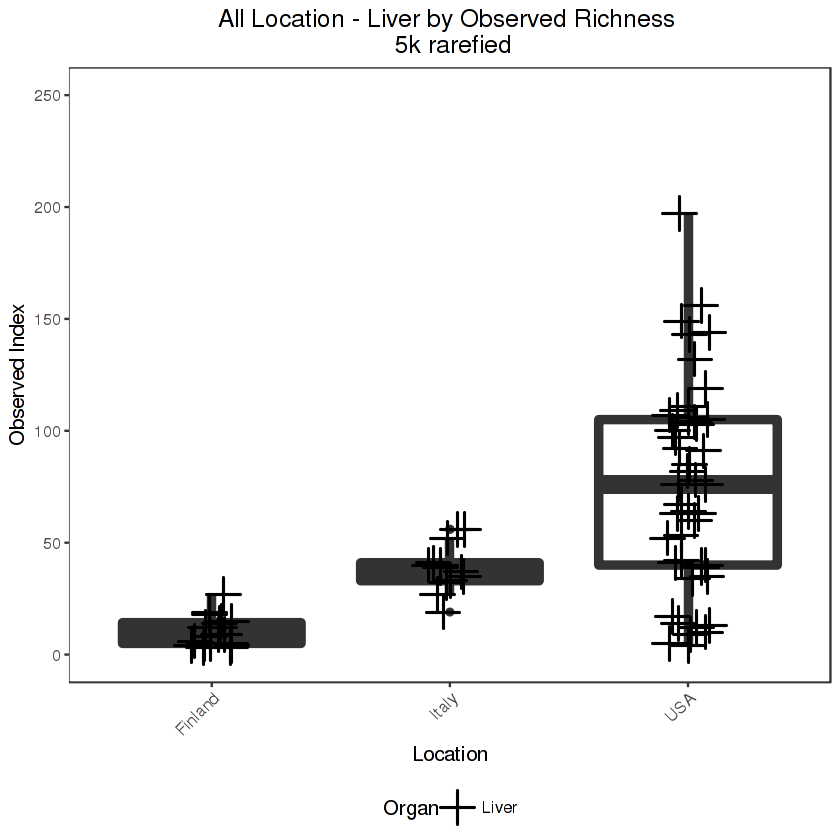

In [54]:
p = ggplot(na.omit(dfobs), aes(x = Location, y = Observed)) + ggtitle("All Location - Liver by Observed Richness \n 5k rarefied")

p = p + geom_boxplot(lwd=2) + ylab("Observed Index") + ylim(0,250)

p = p + geom_point(size = 6,alpha=1,stroke=1, aes(shape = Organ),
                   position = position_jitter(h = 0, w = 0.1)) +
                   scale_shape_manual(values=c(3))
                   
                                                

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

png('All_liver_observed.png', width=7.5, height=10, units='in', res=300)
plot(p)
dev.off()

### Rank Abundance and subsequent statistical analyses

In [23]:
head(cadaver.mdf)

X,OTU,Sample,Abundance,X.SampleID,BarcodeSequence,LinkerPrimerSequence,RTL_run,Case_no,Sex,...,bmi,bmi_category,Description,Rank1,Rank2,Rank3,Rank4,Rank5,Rank6,Rank7
301828,TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT,4522.C1Liver,0.9991667,4522.C1Liver,AAAACAAC,GTGCCAGCMGCCGCGGTAA,4522,C1,M,...,25.31,overweight,4522.C1_Liver,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptostreptococcaceae,g__,s__
156553,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGCGCTTAACGTGGGAACTGCATTTGAAACTGGCAAGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGG,4885.44Liver,0.9991332,4885.44Liver,AAAACAGA,GTGCCAGCMGCCGCGGTAA,4885,L630,F,...,45.90,obese,4885.44_Liver,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacteriales,f__Enterobacteriaceae,g__,s__
31705,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG,3813.35Heart,0.9986475,3813.35Heart,AAAACCTA,GTGCCAGCMGCCGCGGTAA,35,C38,F,...,15.85,underweight,3813.35_Heart,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__
31867,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG,3813.34Brain,0.9985421,3813.34Brain,AAAACCGT,GTGCCAGCMGCCGCGGTAA,34,C38,F,...,15.85,underweight,3813.34_Brain,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__
367357,TACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGTCATTGGAAACTGGAAAACTTGAGTGCAGAAGAGGAAAGTGGAATTCCATG,4885.5Liver,0.9983525,4885.5Liver,AAAACATG,GTGCCAGCMGCCGCGGTAA,4885,L641,M,...,28.65,overweight,4885.5_Liver,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,s__
301887,TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT,3813.27Spleen,0.9975804,3813.27Spleen,AAAACCAT,GTGCCAGCMGCCGCGGTAA,27,C29,M,...,24.78,normal,3813.27_Spleen,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptostreptococcaceae,g__,s__


In [21]:
cadaver.mdf = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/MDFfiles/cadaver.mdf.csv")

In [40]:
N = 10

topN = cadaver.mdf %>%
    group_by(OTU) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(OTU) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("OTU")

mdf.other = cadaver.mdf %>%
    mutate(OTU.other = ifelse(OTU %in% topN, as.character(OTU), "Other")) %>%
    group_by(Sample,Organ, OTU.other) %>%
    summarize(Abundance = mean(Abundance)) %>%
    arrange(Abundance)

mdf.summary = mdf.other %>%
    group_by(Organ, OTU.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((OTU.other))

Selecting by m


In [27]:
tax = tax_table(cadaver)

In [41]:
write.csv(mdf.summary, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/rank_abundance/cadaver.mdf.top10_OTU.byorgan.summary.csv")
write.csv(mdf.other, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/rank_abundance/cadaver.mdf.top10_OTU.byorgan.other.csv")
write.csv(tax, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/rank_abundance/cadaver.complete.taxtable.csv" )

#### USA - Clostridiales

In [16]:
usa = subset_samples(cadaver, Location=="USA")
usa.clostridia = subset_taxa(usa, Rank4=="o__Clostridiales")